# What is machine learning?

Machine learning is the study and use of algorithms that can learn from and make predictions on data.

Machine learning problems generally fall into one of two types:

1. **Supervised learning**: Our data has associated attributes that we would like to predict.
    * Regression: The attributes that we would like to predict are continuous.
    * Classification: We would like to classify each data point as one of a finite number of categories.
2. **Unsupervised learning**: Our data does not have a corresponding set of target values. Examples:
    * Clustering: Discover groups of similar examples within the data.
    * Visualization: Project the data down from a high-dimensional space to two or three dimensions.

## Example: supervised learning (regression) with Linear Regression
References:
 * http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
 * https://chrisalbon.com/machine-learning/linear_regression_scikit-learn.html

In [120]:
!pip install sklearn

In [121]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
# Download the diabetes dataset (http://scikit-learn.org/stable/datasets/index.html#diabetes-dataset)
!mkdir data
!curl https://raw.githubusercontent.com/mikekaminsky/python-for-data-analysis/class_4/data/diabetes.csv > 'data/diabetes.csv'

mkdir: data: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 91357  100 91357    0     0   123k      0 --:--:-- --:--:-- --:--:--  123k


In [123]:
# Features have been mean centered and scaled by the standard deviation times n_samples
df = pd.read_csv('data/diabetes.csv', index_col=False)

In [124]:
# Explore the data
df.head()

,age,sex,body_mass_index,avg_blood_pressure,S1,S2,S3,S4,S5,S6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### Problem statement
Predict a patient's disease progression given his/her BMI.

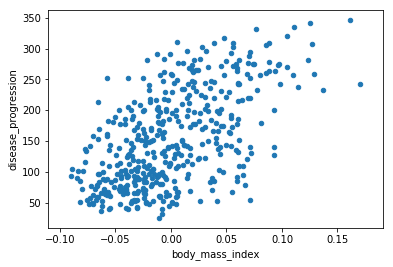

In [125]:
df.plot(x='body_mass_index', y='disease_progression', kind='scatter')

### Cross-validation

* To judge how good our model is, we need to reserve a portion of the data as the "test" dataset.
* The remaining portion of data that we train our model on is the "training" dataset
* To compare the performance of different models, we compare them on the test set. This prevents us from thinking a model is very good if it "cheats" by fitting itself exactly to the data it's training on.

In [126]:
# Break up the data into test and train sets
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75 # randomly assign 75% of data to training set

Exercise: Using the `is_train` column as a mask, create two dataframes called `train` and `test` that only contain data with `True` and `False` values, respectively.

```
train = ???
test = ???
```

In [127]:
# Solution
train = df[df['is_train'] == True]
test = df[df['is_train'] == False]

In [128]:
X_train = train['body_mass_index'].reshape(-1, 1)
# X_train is now a 2D numpy array where rows are samples and columns are features
# the second parameter, 1, means the new array should have 1 column, since we are only looking at one feature
# the first parameter, -1, means 'infer the appropriate number of rows', which should be len(df)
y_train = train['disease_progression']

X_test = test['body_mass_index'].reshape(-1, 1)
y_test = test['disease_progression']

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [129]:
# use the linear regression model from scikit-learn!
ols = linear_model.LinearRegression()

In [130]:
model = ols.fit(X_train, y_train)

In [131]:
# View the training model's slope and y-intercept
print(model.coef_)
print(model.intercept_)

[ 964.10418911]
152.38236033


In [132]:
model.predict(X_test)[0]

211.86393148711284

In [133]:
list(y_test)[0]

151.0

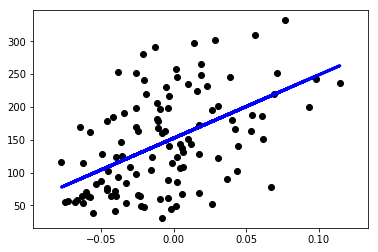

In [134]:
# Plot predicted values and actual values for the test set
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, model.predict(X_test), color='blue', linewidth=3)

plt.show()

### Exercise: Evaluate the results

Compute the Residual Sum of Squares for the model: the sum of the squares of the differences between the predicted value and the actual y value for all samples.

Suggested steps:

* Add a column to `test` that contains the predicted disease progression for each row
* Add another column that contains `(predicted_disease_progression - disease_progression)**2`
* Use the pandas `sum` function to compute the sum of the previous column

## Example: supervised learning (classification) with Random Forests

Background on decision trees: https://en.wikipedia.org/wiki/Decision_tree_learning
Slides: https://docs.google.com/presentation/d/15_T-CxJcbFl2O7dIRM8eauwSWd-74hW9jGZWAQpf1iE/edit?usp=sharing

In [17]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

We'll use the famous [Iris](https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg) dataset, which comes out of the box with scikit-learn. Each sample contains the sepal length, sepal width, petal length, petal width, and species of an iris.

In [18]:
iris = load_iris()

In [19]:
# load the data into a dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [20]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [23]:
# add category labels to the dataframe
df['species'] = iris.target
# map the integers to their corresponding species name and add to dataframe
# woah, cool feature of numpy arrays! they can accept an array as a list of indices!
df['species_name'] = iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Problem statement
Predict the species of an iris (setosa, versicolor, or virginica) based on its sepal length, sepal width, petal length, and petal width.

In [24]:
# create test and training data
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
train, test = df[df['is_train'] == True], df[df['is_train'] == False]

In [25]:
X_train = train[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y_train = train['species']

X_test = test[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y_test = test['species']

In [26]:
# Create a random forest classifier. By convention, clf means 'classifier'
clf = RandomForestClassifier(n_jobs=2)

In [27]:
# Train the classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [28]:
# Apply the classifier we trained to the test data
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1,
       2, 2])

In [29]:
# How confident is the classifier that the sample belongs in each of the 3 classes?
clf.predict_proba(X_test)[0:10]

array([[ 1. ,  0. ,  0. ],
       [ 0.9,  0.1,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0.8,  0.2]])

## Evaluating the results

### Confusion Matrix

In [30]:
# create a confusion matrix
preds = iris.target_names[clf.predict(X_test)]
pd.crosstab(test['species_name'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,9,0,0
versicolor,0,9,0
virginica,0,2,5


### F1 Score

$$ F_1 = 2 * \frac{p * r}{p + r} $$
p = precision = (# correct positive predictions) / (total # positive predictions)

r = recall = (# correct positive predictions) / (# actual positive samples)

In [31]:
from sklearn.metrics import f1_score

f1_score(test['species_name'], preds, average='weighted')

0.91733333333333333

## View feature importance


In [32]:
list(zip(iris.feature_names, clf.feature_importances_))

[('sepal length (cm)', 0.18678130631918352),
 ('sepal width (cm)', 0.052994514684094787),
 ('petal length (cm)', 0.43293090419725494),
 ('petal width (cm)', 0.32729327479946679)]

## Random Forest Hyperparameters
* `n_estimators`: the number of trees in the forest (defaults to 10)
* `max_features`: the max number of features to use in each individual decision tree (defaults to sqrt(num features))
* `max_depth`: maximum depth of the decision tree
* `min_samples_split`: minimum number of samples required to split an internal node (defaults to 2)
* `min_samples_leaf`: minimum number of samples required to be at a leaf node

Exercise: experiment with the `n_estimators` and `max_features` parameters to try to improve the F1 score. Remember to compute F1 on the test data only!

In [33]:
n_estimators = [1, 10, 100]
max_features = [1, 2, 3, 4]

In [34]:
for est in n_estimators:
    for feat in max_features:
        clf = RandomForestClassifier(n_jobs=2, n_estimators=est, max_features=feat)
        clf.fit(X_train, y_train)
        preds = iris.target_names[clf.predict(X_test)]
        f1 = f1_score(test['species_name'], preds, average='weighted')
        print("F1 Score with {feat} features and {est} estimators is: {f1}".format(feat=feat, est=est, f1=f1))

F1 Score with 1 features and 1 estimators is: 0.9173333333333333
F1 Score with 2 features and 1 estimators is: 0.8722077922077922
F1 Score with 3 features and 1 estimators is: 0.8722077922077922
F1 Score with 4 features and 1 estimators is: 0.9601568627450979
F1 Score with 1 features and 10 estimators is: 0.9173333333333333
F1 Score with 2 features and 10 estimators is: 0.9173333333333333
F1 Score with 3 features and 10 estimators is: 0.8722077922077922
F1 Score with 4 features and 10 estimators is: 0.8722077922077922
F1 Score with 1 features and 100 estimators is: 0.9595141700404858
F1 Score with 2 features and 100 estimators is: 0.9173333333333333
F1 Score with 3 features and 100 estimators is: 0.8722077922077922
F1 Score with 4 features and 100 estimators is: 0.8722077922077922


# Project

Remember our 311 data set?

In [99]:
complaints = pd.read_csv('../pandas-cookbook/data/311-service-requests.csv', low_memory=False)

In [100]:
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


In [101]:
complaints.columns = [x.lower().replace(' ','_') for x in complaints.columns]
complaints.columns

Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'descriptor', 'location_type', 'incident_zip',
       'incident_address', 'street_name', 'cross_street_1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_type',
       'city', 'landmark', 'facility_type', 'status', 'due_date',
       'resolution_action_updated_date', 'community_board', 'borough',
       'x_coordinate_(state_plane)', 'y_coordinate_(state_plane)',
       'park_facility_name', 'park_borough', 'school_name', 'school_number',
       'school_region', 'school_code', 'school_phone_number', 'school_address',
       'school_city', 'school_state', 'school_zip', 'school_not_found',
       'school_or_citywide_complaint', 'vehicle_type', 'taxi_company_borough',
       'taxi_pick_up_location', 'bridge_highway_name',
       'bridge_highway_direction', 'road_ramp', 'bridge_highway_segment',
       'garage_lot_name', 'ferry_direction', 'ferry_termina

In [102]:
useful_columns = ['created_date', 'closed_date','due_date', 'agency_name', 'complaint_type', 
                  'borough', 'latitude', 'longitude']

In [103]:
complaints = complaints[useful_columns]
complaints = complaints.dropna()
complaints.closed_date = pd.to_datetime(complaints.closed_date)
complaints.due_date = pd.to_datetime(complaints.due_date)
complaints.head()

,created_date,closed_date,due_date,agency_name,complaint_type,borough,latitude,longitude
2,10/31/2013 02:00:24 AM,2013-10-31 02:40:32,2013-10-31 10:00:24,New York City Police Department,Noise - Commercial,MANHATTAN,40.843330,-73.939144
3,10/31/2013 01:56:23 AM,2013-10-31 02:21:48,2013-10-31 09:56:23,New York City Police Department,Noise - Vehicle,MANHATTAN,40.778009,-73.980213
7,10/31/2013 01:44:19 AM,2013-10-31 01:58:49,2013-10-31 09:44:19,New York City Police Department,Noise - Commercial,QUEENS,40.671816,-73.843092
8,10/31/2013 01:44:14 AM,2013-10-31 02:28:04,2013-10-31 09:44:14,New York City Police Department,Noise - Commercial,MANHATTAN,40.739913,-74.000790
9,10/31/2013 01:34:41 AM,2013-10-31 02:23:51,2013-10-31 09:34:41,New York City Police Department,Noise - Commercial,BROOKLYN,40.668204,-73.950648


Project: predict whether a complaint will be resolved on time (closed date is before due date) using a random forest classifier with these features.

Suggested steps:
* Add a "on time" column to the dataframe with a boolean value True or False if the complaint was resolved on time or not
* Partition the data into a train set and a test set
* Experiment with a random forest classifier with different hyperparameters to try to achieve the best F1 score 

In [149]:
complaints['on_time'] = complaints['closed_date'] <= complaints['due_date']

In [150]:
X_train = complaints[['agency_name', 'complaint_type', 'borough', 'latitude', 'longitude']]
y_train = complaints['on_time']

In [151]:
X_train = pd.get_dummies(X_train, columns=['borough', 'complaint_type', 'agency_name'])

In [152]:
X_train.head()

,latitude,longitude,borough_BRONX,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,borough_Unspecified,complaint_type_Animal Abuse,complaint_type_Animal in a Park,...,agency_name_School - PS 57 Crescent,agency_name_School - PS 66,agency_name_School - PS 76 William Hallet,agency_name_School - PS 9 Sarah Anderson,agency_name_School - Park Slope Collegiate,agency_name_School - School of Performing Arts,agency_name_School - The Children's Workshop School,agency_name_School - The Mott Hall School,agency_name_Senior Citizen Rent Increase Exemption Unit,agency_name_Taxi and Limousine Commission
2,40.843330,-73.939144,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40.778009,-73.980213,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,40.671816,-73.843092,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,40.739913,-74.000790,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,40.668204,-73.950648,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
clf = RandomForestClassifier(n_jobs=2)

In [154]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [155]:
preds = clf.predict(X_train)

In [156]:
preds

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [158]:
pd.crosstab(y_train, preds, rownames=['Actual'], colnames=['Predicted'])

Predicted,False,True
Actual,,
False,1133,253
True,80,22450


In [115]:
f1_score(y_train, preds)

0.99276724690893803